In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn


[notice] A new release of pip is available: 25.2 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)

In [3]:
df = pd.read_csv("../../../data/raw/BankChurners.csv")

In [4]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


## EXPLORATORY DATA ANALYSIS

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [6]:
df.describe(include='all')

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,1.012700e+04,10127,10127.000000,10127,10127.000000,10127,10127,10127,10127,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
unique,NaN,2,NaN,2,NaN,7,4,6,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Existing Customer,NaN,F,NaN,Graduate,Married,Less than $40K,Blue,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,8500,NaN,5358,NaN,3128,4687,3561,9436,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,7.391776e+08,NaN,46.325960,NaN,2.346203,NaN,NaN,NaN,NaN,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,NaN,8.016814,NaN,1.298908,NaN,NaN,NaN,NaN,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,NaN,26.000000,NaN,0.000000,NaN,NaN,NaN,NaN,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,NaN,41.000000,NaN,1.000000,NaN,NaN,NaN,NaN,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,NaN,46.000000,NaN,2.000000,NaN,NaN,NaN,NaN,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,NaN,52.000000,NaN,3.000000,NaN,NaN,NaN,NaN,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900


In [7]:
df['churn'] = df['Attrition_Flag'].map({
    'Existing Customer':0,
    'Attrited Customer':1
})


In [8]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2,churn
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991,0
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994,0
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998,0
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987,0
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998,0


In [9]:
##dropping unnecessary columns

In [10]:
df = df.drop([
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2',
    'Attrition_Flag',
], axis=1)


In [11]:
df.head()

,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,churn
0,768805383,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0
1,818770008,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0
2,713982108,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0
3,769911858,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0
4,709106358,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0


In [12]:
df = df.drop('CLIENTNUM', axis=1)

In [13]:
df['churn'].value_counts(normalize=True)

churn
0    0.83934
1    0.16066
Name: proportion, dtype: float64

In [14]:
## only 83% churn so the data is imbalance!

In [15]:
cat_cols = df.select_dtypes(include='object').columns
num_cols = df.select_dtypes(exclude='object').columns

In [16]:
df.head()

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,churn
0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0
1,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0
2,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0
3,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0
4,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0


In [17]:
### Checking the impact of categorical columns on churn rate (transposed)
def churn_rate_cat(col):
    table = pd.crosstab(df[col], df['churn'], normalize='index') * 100
    return table.T  

for col in cat_cols:
    print("\n", col)
    display(churn_rate_cat(col))


 Gender


Gender,F,M
churn,,
0,82.642777,85.384777
1,17.357223,14.615223



 Education_Level


Education_Level,College,Doctorate,Graduate,High School,Post-Graduate,Uneducated,Unknown
churn,,,,,,,
0,84.797631,78.935698,84.430946,84.798808,82.170543,84.06187,83.146807
1,15.202369,21.064302,15.569054,15.201192,17.829457,15.93813,16.853193



 Marital_Status


Marital_Status,Divorced,Married,Single,Unknown
churn,,,,
0,83.823529,84.873053,83.058585,82.777036
1,16.176471,15.126947,16.941415,17.222964



 Income_Category


Income_Category,$120K +,$40K - $60K,$60K - $80K,$80K - $120K,Less than $40K,Unknown
churn,,,,,,
0,82.668501,84.860335,86.519258,84.234528,82.813816,83.183453
1,17.331499,15.139665,13.480742,15.765472,17.186184,16.816547



 Card_Category


Card_Category,Blue,Gold,Platinum,Silver
churn,,,,
0,83.902077,81.896552,75.0,85.225225
1,16.097923,18.103448,25.0,14.774775


In [18]:
"""Gender, education, income, and card type show small to moderate churn differences; 
none of these alone gives very strong segmentation, but they can contribute as features in a richer model.
Education level: Doctorate and Post‑Graduate churn meaningfully higher than College/High School; 
this is a real but not huge separation and has been observed in similar credit‑card churn datasets.
Income category: Middle‑income (60–120K) customers churn less than <40K or 120K+, 
which can be used for risk bands (low, mid, high churn risk by income).
Card category: Platinum stands out with much higher churn, but verify counts; if n is small, don’t over‑interpret.
Gender and marital status differences are small;
"""


'Gender, education, income, and card type show small to moderate churn differences; \nnone of these alone gives very strong segmentation, but they can contribute as features in a richer model.\nEducation level: Doctorate and Post‑Graduate churn meaningfully higher than College/High School; \nthis is a real but not huge separation and has been observed in similar credit‑card churn datasets.\nIncome category: Middle‑income (60–120K) customers churn less than <40K or 120K+, \nwhich can be used for risk bands (low, mid, high churn risk by income).\nCard category: Platinum stands out with much higher churn, but verify counts; if n is small, don’t over‑interpret.\nGender and marital status differences are small;\n'

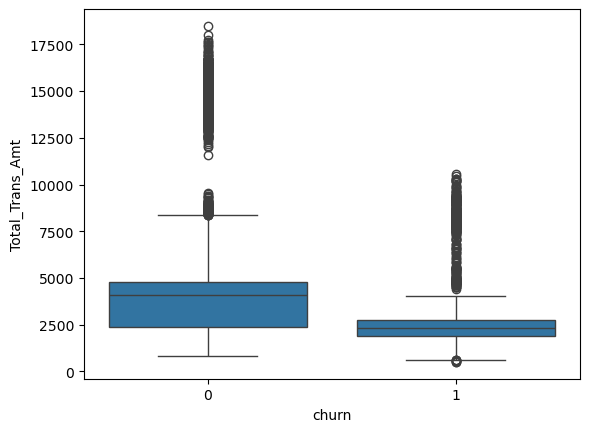

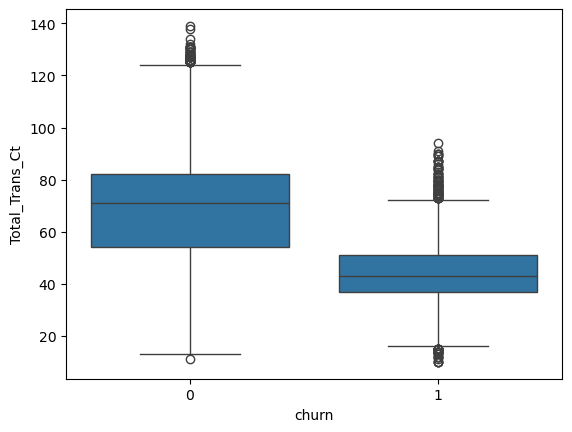

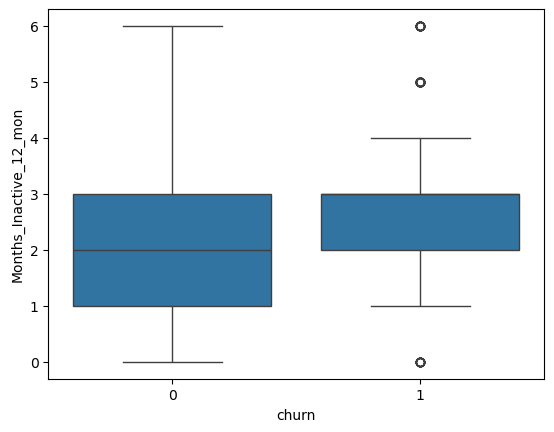

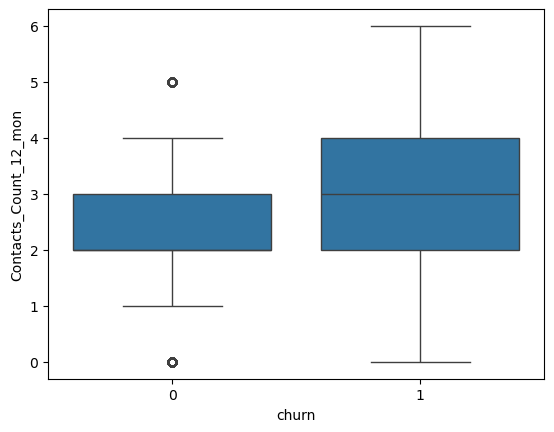

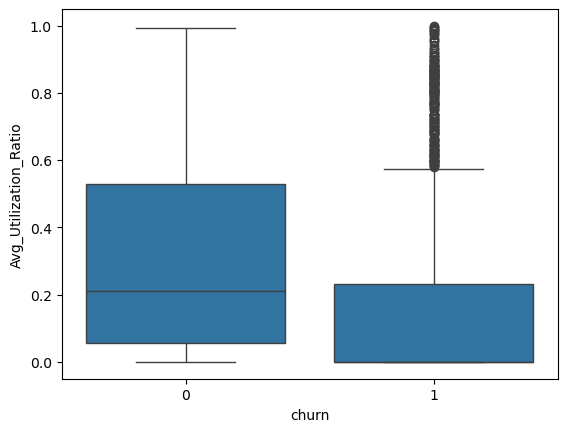

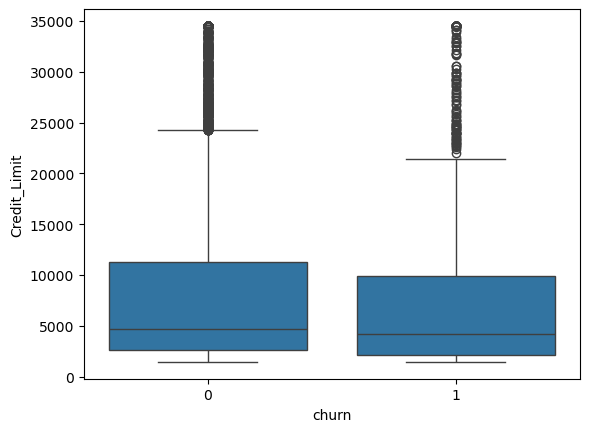

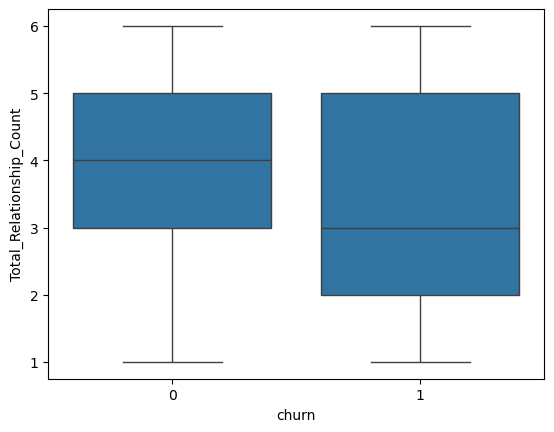

In [19]:
df.groupby('churn')[num_cols].mean().T
important_cols = [
'Total_Trans_Amt',
'Total_Trans_Ct',
'Months_Inactive_12_mon',
'Contacts_Count_12_mon',
'Avg_Utilization_Ratio',
'Credit_Limit',
'Total_Relationship_Count'
]

for col in important_cols:
    sns.boxplot(x='churn', y=col, data=df)
    plt.show()


In [20]:
num_cols = df.select_dtypes(exclude='object').columns
df.groupby('churn')[num_cols].mean().T.sort_values(1, ascending=False)

churn,0,1
Credit_Limit,8726.877518,8136.039459
Avg_Open_To_Buy,7470.273400,7463.216472
Total_Trans_Amt,4654.655882,3095.025814
Total_Revolving_Bal,1256.604118,672.822987
Customer_Age,46.262118,46.659496
Total_Trans_Ct,68.672588,44.933620
Months_on_book,35.880588,36.178242
Total_Relationship_Count,3.914588,3.279656
Contacts_Count_12_mon,2.356353,2.972342
Months_Inactive_12_mon,2.273765,2.693301


In [21]:
"""
Key findings from numerical feature analysis:

1. Strong churn indicators:
   - Lower transaction amount and transaction count
   - Declining transaction behaviour over time
   - Higher inactivity
   - More customer service contacts
   - Fewer bank relationships

2. Medium indicators:
   - Lower credit utilization

3. Weak indicators:
   - Age, tenure, dependents, credit limit

Conclusion:
Churn is primarily driven by BEHAVIOURAL disengagement,
not demographic characteristics.
"""


'\nKey findings from numerical feature analysis:\n\n1. Strong churn indicators:\n   - Lower transaction amount and transaction count\n   - Declining transaction behaviour over time\n   - Higher inactivity\n   - More customer service contacts\n   - Fewer bank relationships\n\n2. Medium indicators:\n   - Lower credit utilization\n\n3. Weak indicators:\n   - Age, tenure, dependents, credit limit\n\nConclusion:\nChurn is primarily driven by BEHAVIOURAL disengagement,\nnot demographic characteristics.\n'

In [22]:
def churn_risk_buckets(col, q=4):
    temp = df.copy()
    temp[col + "_bucket"] = pd.qcut(temp[col], q=q, duplicates='drop')
    table = pd.crosstab(temp[col + "_bucket"], temp['churn'], normalize='index') * 100
    table = table.rename(columns={0:'Retained %', 1:'Churn %'})
    return table.sort_index()

In [23]:
bucket_cols = [
'Months_Inactive_12_mon',
'Contacts_Count_12_mon',
'Total_Trans_Ct',
'Total_Trans_Amt',
'Total_Relationship_Count',
'Avg_Utilization_Ratio',
'Total_Ct_Chng_Q4_Q1',
'Total_Amt_Chng_Q4_Q1'
]
for col in bucket_cols:
    print("\n\n====", col, "====")
    display(churn_risk_buckets(col))



==== Months_Inactive_12_mon ====


churn,Retained %,Churn %
Months_Inactive_12_mon_bucket,,
"(-0.001, 2.0]",88.816739,11.183261
"(2.0, 3.0]",78.523141,21.476859
"(3.0, 6.0]",75.440977,24.559023




==== Contacts_Count_12_mon ====


churn,Retained %,Churn %
Contacts_Count_12_mon_bucket,,
"(-0.001, 2.0]",89.892683,10.107317
"(2.0, 3.0]",79.852071,20.147929
"(3.0, 6.0]",73.612824,26.387176




==== Total_Trans_Ct ====


churn,Retained %,Churn %
Total_Trans_Ct_bucket,,
"(9.999, 45.0]",62.926082,37.073918
"(45.0, 67.0]",79.538217,20.461783
"(67.0, 81.0]",95.529677,4.470323
"(81.0, 139.0]",98.889838,1.110162




==== Total_Trans_Amt ====


churn,Retained %,Churn %
Total_Trans_Amt_bucket,,
"(509.999, 2155.5]",75.592417,24.407583
"(2155.5, 3899.0]",72.472354,27.527646
"(3899.0, 4741.0]",99.131807,0.868193
"(4741.0, 18484.0]",88.533017,11.466983




==== Total_Relationship_Count ====


churn,Retained %,Churn %
Total_Relationship_Count_bucket,,
"(0.999, 3.0]",78.039480,21.960520
"(3.0, 4.0]",88.232218,11.767782
"(4.0, 5.0]",87.995769,12.004231
"(5.0, 6.0]",89.496249,10.503751




==== Avg_Utilization_Ratio ====


churn,Retained %,Churn %
Avg_Utilization_Ratio_bucket,,
"(-0.001, 0.023]",63.400236,36.599764
"(0.023, 0.176]",90.707790,9.292210
"(0.176, 0.503]",90.628707,9.371293
"(0.503, 0.999]",91.099684,8.900316




==== Total_Ct_Chng_Q4_Q1 ====


churn,Retained %,Churn %
Total_Ct_Chng_Q4_Q1_bucket,,
"(-0.001, 0.582]",62.396531,37.603469
"(0.582, 0.702]",88.744589,11.255411
"(0.702, 0.818]",92.298578,7.701422
"(0.818, 3.714]",92.371871,7.628129




==== Total_Amt_Chng_Q4_Q1 ====


churn,Retained %,Churn %
Total_Amt_Chng_Q4_Q1_bucket,,
"(-0.001, 0.631]",75.752835,24.247165
"(0.631, 0.736]",87.275628,12.724372
"(0.736, 0.859]",88.613081,11.386919
"(0.859, 3.397]",84.198020,15.801980


In [24]:
"""
Key EDA finding:
Churn is primarily driven by behavioural disengagement.

Top churn predictors:
1. Low transaction count
2. Low credit utilization
3. High inactivity
4. Increasing customer service contacts
5. Decline in transactions over time

Demographic features were weak predictors compared to behavioural features.
"""


'\nKey EDA finding:\nChurn is primarily driven by behavioural disengagement.\n\nTop churn predictors:\n1. Low transaction count\n2. Low credit utilization\n3. High inactivity\n4. Increasing customer service contacts\n5. Decline in transactions over time\n\nDemographic features were weak predictors compared to behavioural features.\n'

In [26]:
# Convert categorical variables into numeric using one-hot encoding.
# drop_first=True avoids dummy variable trap for linear models.
cat_cols = df.select_dtypes(include='object').columns

df = pd.get_dummies(df, columns=cat_cols, drop_first=True)


## TRAINING THE MODEL

In [27]:
##Train/Test split
from sklearn.model_selection import train_test_split

X = df.drop('churn', axis=1)
y = df['churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [28]:
# Scale numerical features so that models like Logistic Regression can converge properly.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [29]:
"""
Modeling Approach

This project aims to predict customer churn as a binary classification problem.
Our goal is to estimate the probability that a customer will churn based on
their behavioural, financial and demographic features.

Model selection strategy:
1. Logistic Regression – serves as an interpretable linear baseline.
2. Random Forest – captures non-linear relationships and feature interactions.
3. Gradient Boosting (next) – used to achieve best predictive performance.

Evaluation focus:
In churn prediction, missing a churner is costly for the business.
Therefore, Recall is a key evaluation metric along with ROC-AUC.

The final model will produce churn risk scores that can be used by
retention teams to proactively engage high-risk customers.
"""

'\nModeling Approach\n\nThis project aims to predict customer churn as a binary classification problem.\nOur goal is to estimate the probability that a customer will churn based on\ntheir behavioural, financial and demographic features.\n\nModel selection strategy:\n1. Logistic Regression – serves as an interpretable linear baseline.\n2. Random Forest – captures non-linear relationships and feature interactions.\n3. Gradient Boosting (next) – used to achieve best predictive performance.\n\nEvaluation focus:\nIn churn prediction, missing a churner is costly for the business.\nTherefore, Recall is a key evaluation metric along with ROC-AUC.\n\nThe final model will produce churn risk scores that can be used by\nretention teams to proactively engage high-risk customers.\n'